<h1>Detección de círculos - Hough circles</h1>

<b>cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)</b>
<ul>
<li>Method - Solo disponible cv2.HOUGH_GRADIENT</li>
<li>dp - Inverse ratio of accumulator resolution</li>
<li>MinDist - La minima distancia entre los centros de los circulos detectados</li>
<li>param1 - Valor de gradiente utilizado en la detección de bordes</li>
<li>param2 - Accumulator threshold para el HOUGH_GRADIENT (menores permite que se detecte una mayor cantidad de circulos(falsos positivos))</li>
<li>minRadius - Limita el circulo más pequeño a este tamaño (Segun radio)</li>
<li>MaxRadius - Igual a lo de arriba pero el máximo</li>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

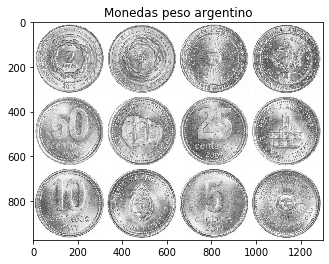

True

In [2]:
image = cv2.imread('peso-argentino-monedas.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


ret,thresh1 = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
cv2.imwrite('thresh1.png', thresh1)


plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.title('Monedas peso argentino'); plt.show()

cv2.imwrite('monedas-peso-argentino.jpg', thresh1)

Se encontraron 12 monedas
Posicion: (525, 225)
Radio: 122
Posicion: (225, 225)
Radio: 122
Posicion: (525, 525)
Radio: 122
Posicion: (1125, 825)
Radio: 122
Posicion: (1125, 525)
Radio: 122
Posicion: (825, 825)
Radio: 122
Posicion: (525, 825)
Radio: 122
Posicion: (825, 225)
Radio: 122
Posicion: (1125, 225)
Radio: 122
Posicion: (225, 525)
Radio: 122
Posicion: (825, 525)
Radio: 122
Posicion: (225, 825)
Radio: 122


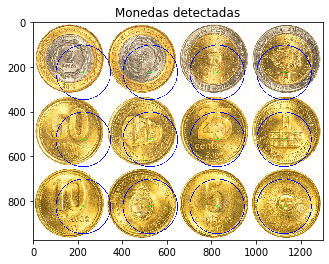

True

In [3]:
blur = cv2.medianBlur(thresh1, 5)
circles = cv2.HoughCircles(thresh1, cv2.HOUGH_GRADIENT, 150, 10, minRadius=100,maxRadius=180)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print('Se encontraron {} monedas'.format(len(circles)))
    for (x, y, r) in circles:
        print ('Posicion: ({}, {})'.format(x, y))
        print ('Radio: {}'.format(r))
        

 
for i in circles:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Monedas detectadas'); plt.show() 
cv2.imwrite('detected_monedas.jpg', image)